### Student Information
Name: 蔡秉翰

Student ID: 107064527

GitHub ID: k52276hank

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

# Part 1: Take Home Exercise

## Package import & Prepare Dataset 

In [1]:
# magic command 
%load_ext autoreload
%autoreload 2

# package import 
import pandas as pd
import numpy as np
import nltk
import math

from helpers import data_mining_helpers as dmh

# Prepare Dateset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [2]:
# Dataset Preprocessing
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ["text"])
X["category"] = twenty_train.target
X["category_name"] = X["category"].apply(lambda label: dmh.format_labels(label, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
X.loc[3:10]

,text,category,category_name
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian


In [4]:
X.loc[[3,7,10], :]

,text,category,category_name
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian


In [5]:
X.loc[lambda series: series.category==3, :][:9]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
18,From: tom_milligan@rainbow.mentorg.com Subject...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
22,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian


In [6]:
X.loc[:, ["text", "category_name"]].loc[::10][:5]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

There is description below about "isnull(obj)" in the document:
> This function takes a scalar or array-like object and indictates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

So only if the patameter obj is NaN, None and empty value, the return value is True.
<br>
The return of isnull() are True in the cases which id are A, B and E.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000) #random state
print(len(X_sample))
for category in categories:
    print("The amount of {0}: {1}.".format(
        category, 
        len(X_sample[lambda series: series.category_name==category])))
X_sample[0:10]

1000
The amount of alt.atheism: 233.
The amount of soc.religion.christian: 247.
The amount of comp.graphics: 249.
The amount of sci.med: 271.


,text,category,category_name
27,From: ruthless@panix.com (Ruth Ditucci) Subjec...,3,soc.religion.christian
1963,From: lehr@austin.ibm.com (Ted Lehr) Subject: ...,2,sci.med
2210,From: edimg@willard.atl.ga.us (Ed pimentel) Su...,1,comp.graphics
167,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
1530,From: rgc3679@bcstec.ca.boeing.com (Robert G. ...,1,comp.graphics
1195,From: dsnyder@falcon.aamrl.wpafb.af.mil Subjec...,1,comp.graphics
1491,From: koberg@spot.Colorado.EDU (Allen Koberg) ...,3,soc.religion.christian
2155,From: beaver@rot.qc.ca (Andre Boivert) Subject...,1,comp.graphics
353,From: reedr@cgsvax.claremont.edu Subject: Re: ...,3,soc.religion.christian
749,From: alex@falcon.demon.co.uk (Alex Kiernan) S...,1,comp.graphics


1. The index is not arrage in order; therefore, sampling is randomly.
2. Original X compares to Sample X, the amount of data is decreasing to the n which I set in sample function.
3. previous X compares to sample X, the amount of same categories are almost similar. 

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [10]:
# import package
import matplotlib.pyplot as plt
%matplotlib inline

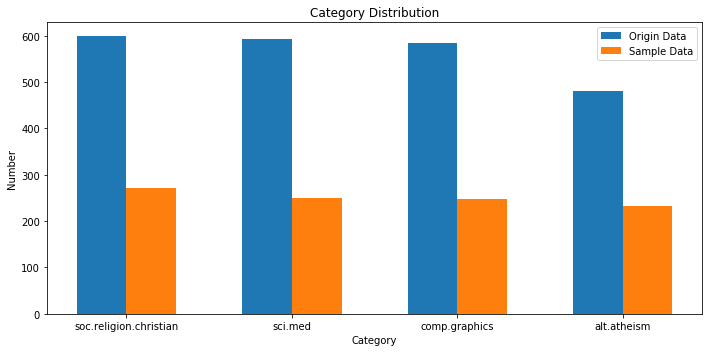

In [29]:
num_groups = len(X.category_name.value_counts())

# data 
origin_data = X.category_name.value_counts().values
sample_data = X_sample.category_name.value_counts().values

# figure setting
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(num_groups)
bar_width = 0.3

# chart plot
rects_origin = ax.bar(index, 
                      origin_data, 
                      bar_width,
                      label='Origin Data')

rects_sample = ax.bar(index+bar_width, 
                      sample_data, 
                      bar_width,
                      label='Sample Data')

# label setting
ax.set_xlabel('Category')
ax.set_ylabel('Number')
ax.set_title('Category Distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# show the figure
fig.tight_layout()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [38]:
fifthRecord = X_counts[0:5,0:100].toarray()[4]
for i, term in enumerate(fifthRecord):
    # find the idx which term is 1 without 0
    if term==1 and i!=0:
        print(count_vect.get_feature_names()[i])

01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [43]:
num_selected = 40

# set 2 axis array
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:num_selected]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:num_selected]]
plot_z = X_counts[:num_selected, :num_selected].toarray()

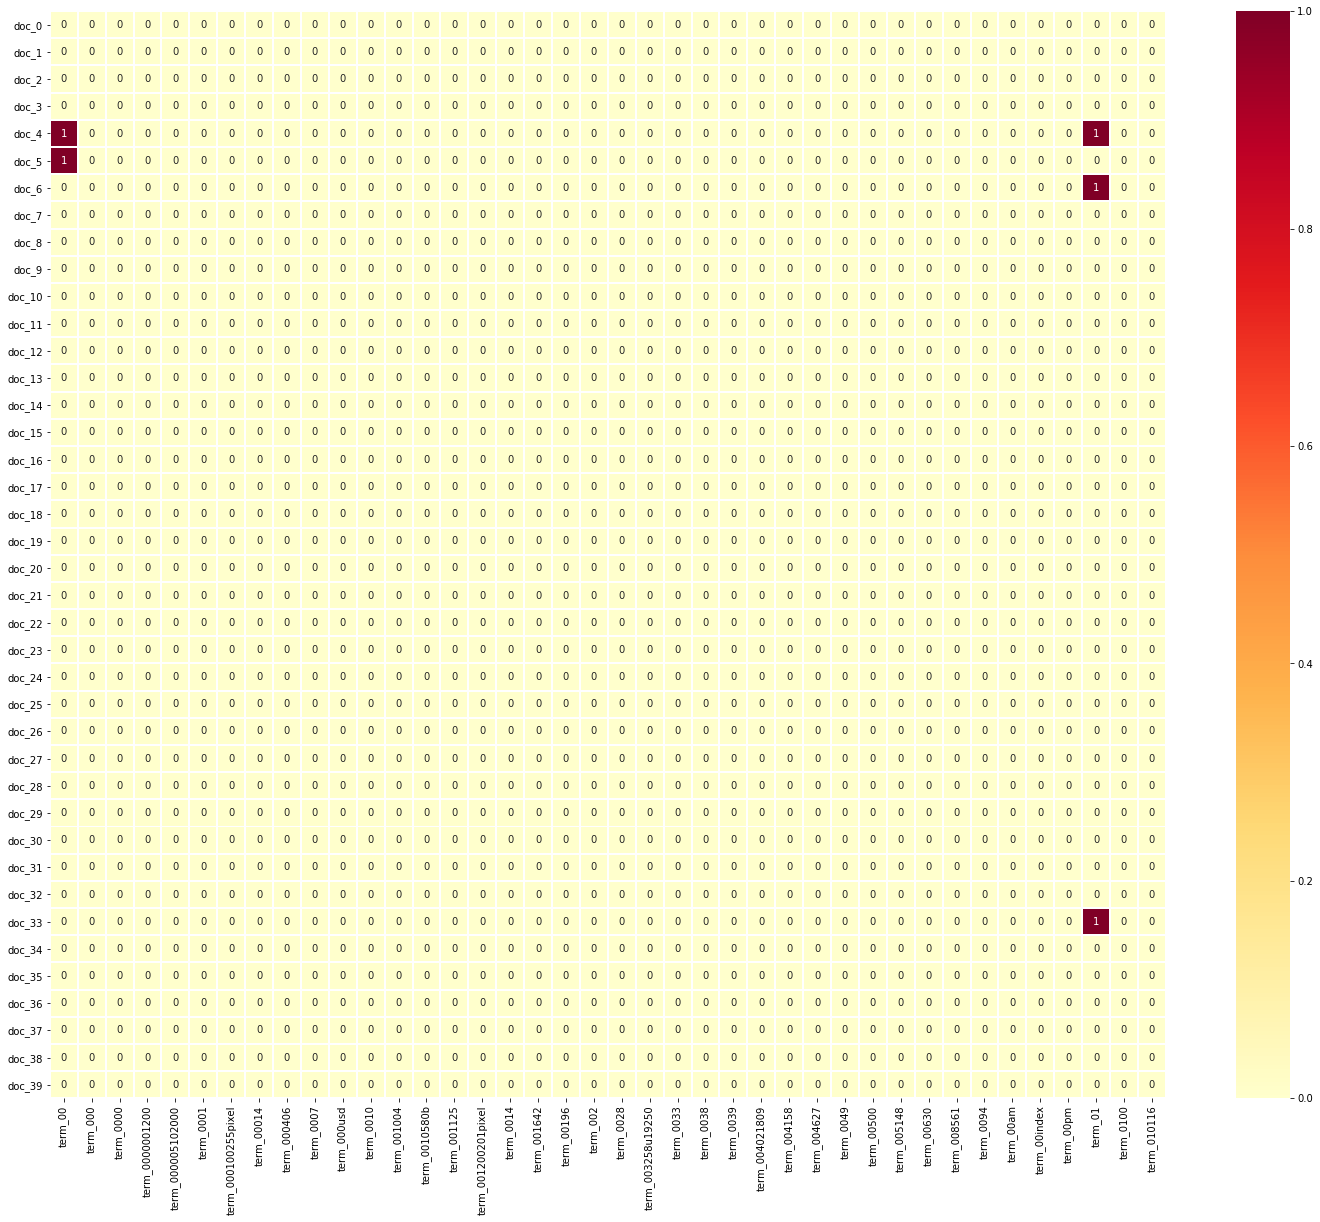

In [47]:
# plot with seaborn
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,20))
ax = sns.heatmap(df_todraw,
                 cmap="YlOrRd",
                 vmin=0, vmax=1, annot=True, linewidths=1)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [48]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

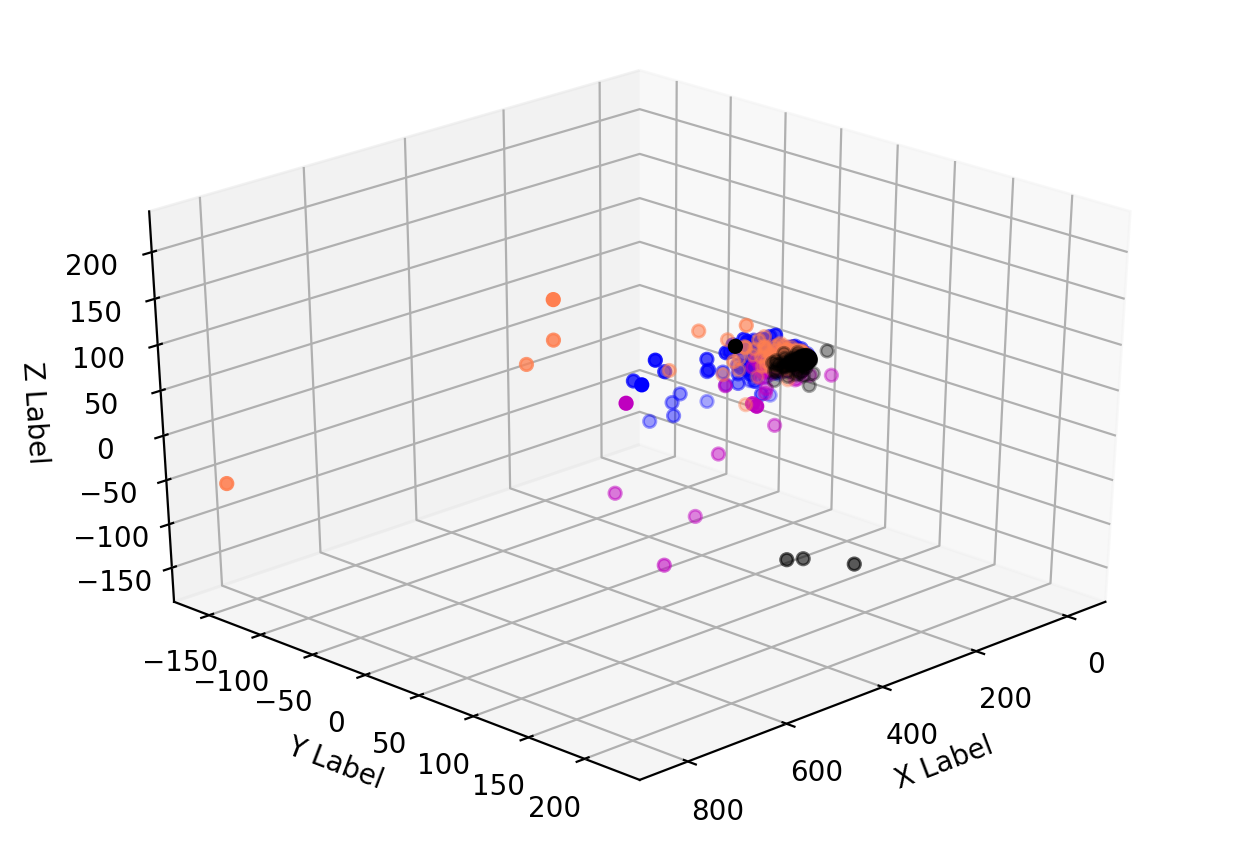

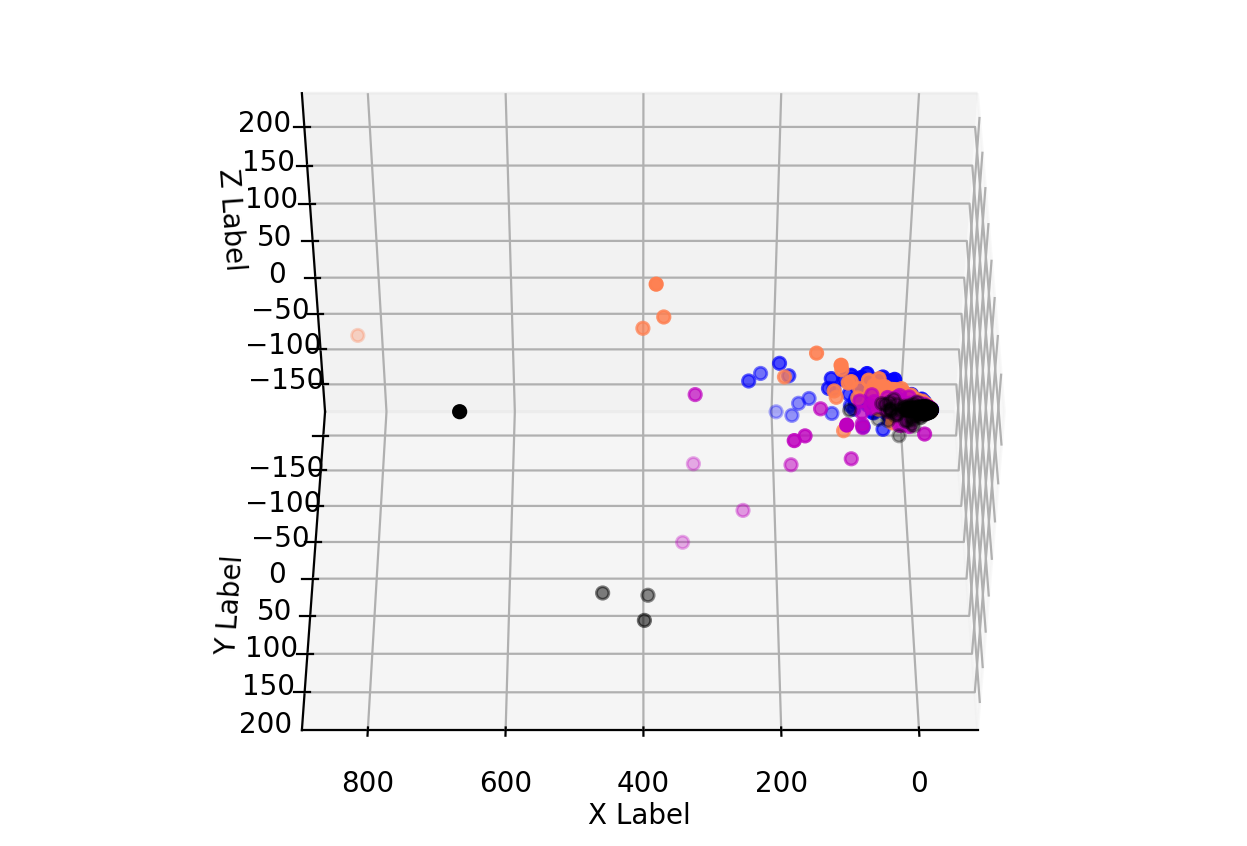

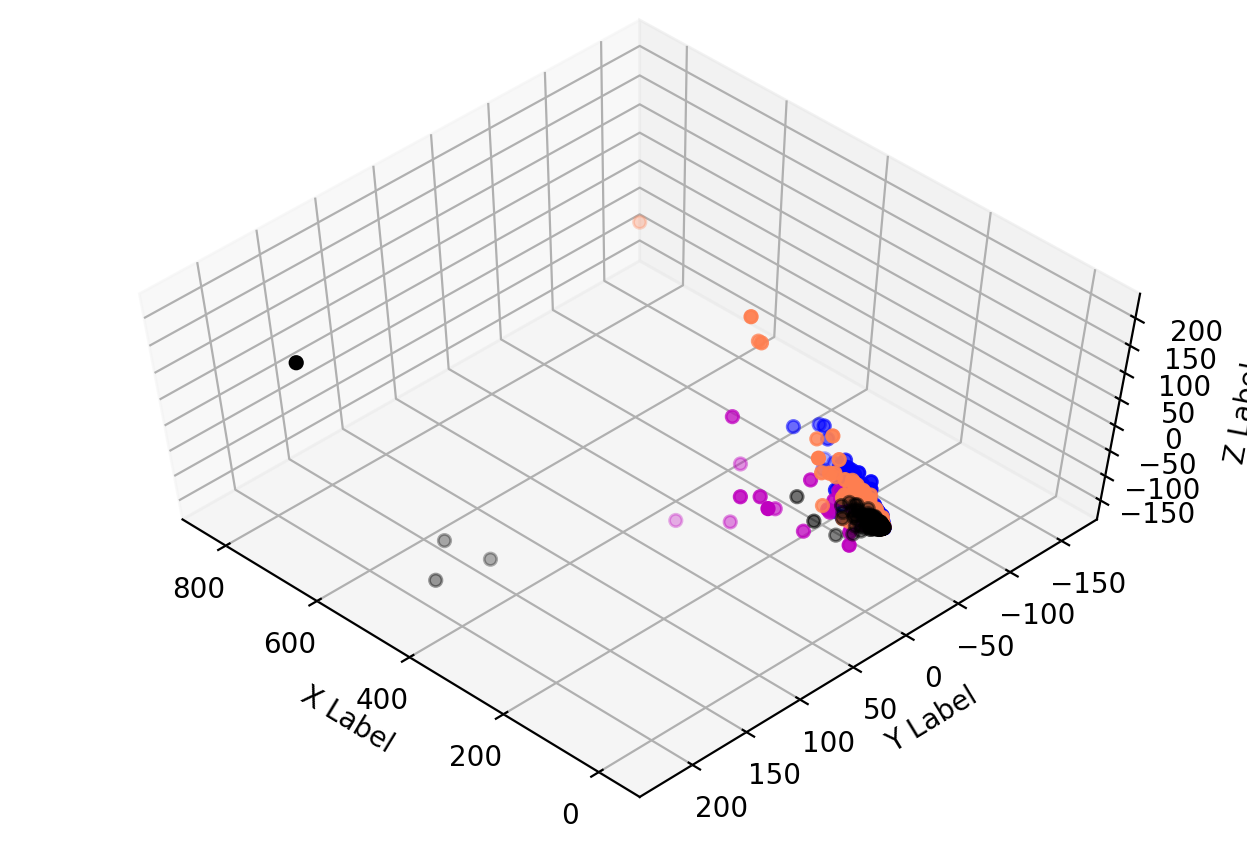

In [75]:
# setting 3 plot figure
fig1 = plt.figure(1, dpi=200)
fig2 = plt.figure(2, dpi=200)
fig3 = plt.figure(3, dpi=200)

# clear plot exists
plt.clf()

# setting 3D Axes for specific elevation and azimuth
ax1 = Axes3D(fig1, elev=30, azim=45)
ax2 = Axes3D(fig2, elev=45, azim=90)
ax3 = Axes3D(fig3, elev=60, azim=135)

# clear axes exist
plt.cla()

# 4 color for 4 categories
col = ['coral', 'blue', 'black', 'm']

# plot 3 figure
for i, category in enumerate(categories):
    # 3 Axes content
    xs = X_reduced[X.category_name == category].T[0]
    ys = X_reduced[X.category_name == category].T[1]
    zs = X_reduced[X.category_name == category].T[2]
    
    ax1.scatter(xs, ys, zs, color=col[i], marker='o')
    ax2.scatter(xs, ys, zs, color=col[i], marker='o')
    ax3.scatter(xs, ys, zs, color=col[i], marker='o')


# 3 axes labels    
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()

>I found that some data points in some angle are disappear because we observe by the angel which those points are overlapping in.  

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [91]:
import plotly.graph_objects as go
import chart_studio.plotly as cs

from plotly.offline import init_notebook_mode

term_frequencies=np.asarray(X_counts.sum(axis=0))[0].tolist()

In [102]:
selected_start = 10000
selected_end = 10300

In [103]:
init_notebook_mode(connected=True)

# sorting by default order
go_figure = go.Figure(
    data=[go.Bar(
        x=count_vect.get_feature_names()[selected_start:selected_end],
        y=term_frequencies[selected_start:selected_end])],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
selected_start = 0
selected_end = 300

In [146]:
# sorting by default order and setting threshold by last number percentage
list_indices_order = np.argsort(term_frequencies)[::-1]
threshold_percentage = 95 # last number percentage of term
threshold_frequency = term_frequencies[list_indices_order[len(list_indices_order)*(100-threshold_percentage)//100]]

term_filter = []
frequecy_filter = []

for idx,term in enumerate(count_vect.get_feature_names()):
    if term_frequencies[idx]>=threshold_frequency and len(term_filter)<300: term_filter.append(term)
        
for frequecy in term_frequencies:
    if frequecy>=threshold_frequency and len(frequecy_filter)<300: frequecy_filter.append(frequecy) 

go_figure = go.Figure(
    data=[go.Bar(
        x=term_filter,
        y=frequecy_filter)],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [111]:
selected_start = 0
selected_end = 300

In [117]:
# sorting by term-frequency
list_indices_order = np.argsort(term_frequencies)[::-1]
term_order = [count_vect.get_feature_names()[idx] for order, idx in enumerate(list_indices_order) if order>=selected_start and order<selected_end]
frequencies_order = [term_frequencies[idx] for order, idx in enumerate(list_indices_order) if order>=selected_start and order<selected_end]

go_figure = go.Figure(
    data=[go.Bar(
        x=term_order,
        y=frequencies_order)],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [149]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
